In [1]:
import networkx as nx
def Create_nodes():
  import networkx as nx
  seed=1000           # seed the graph for reproducibility, you should be doing this  
  G= nx.gnp_random_graph (10, .3, seed=seed )       # here we create a random binomial graph with 10 nodes and an average (expected) connectivity of 10*.3= 3.
  nx.is_connected(G)      # check whether which has at least one path between each pair of nodes.
  import random
  for (u, v) in G.edges():
    eweights=G.edges[u,v]['weight'] = random.randint(1,20)    # assign random weights to edges
  import matplotlib.pyplot as plt
  links = [(u, v) for (u, v, d) in G.edges(data=True)]
  pos = nx.nx_pydot.graphviz_layout(G) 
  nx.draw_networkx_nodes(G, pos, node_size=1200, node_color='lightblue', linewidths=0.25) # draw nodes
  nx.draw_networkx_edges(G, pos, edgelist=links, width=4)                                 # draw edges
  # node labels
  nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
  # edge weight labels
  edge_labels = nx.get_edge_attributes(G, "weight")
  nx.draw_networkx_edge_labels(G, pos, edge_labels)
  plt.title("Created Nodes and edges")
  plt.show()
  return G,edge_labels

Function to find p Random normal distribution

In [2]:
def p():
  import numpy as np
  return np.random.normal(0, 0.25)

Function to Update weights

In [3]:
def update_Weights(W,P,b):
  for i in W:
    W[i] = b * W[i] * P
  return W

Function to find the Overall Load Factor

In [4]:
def dict_diff(W1, W2):
  a=[]
  for i in W1:
    a.append(W2[i]-W1[i])
  return a

Function to find the Find the nodes travelled through , Total time taken for the Journey

In [5]:
def load_and_nodes(G,W,S,D,T):
  base_level = {8:1.0 , 9:0.95, 10:0.9 , 11:0.9 , 12:0.9, 13:0.9, 14:0.95, 15:0.95, 16:0.9,
                17:1.0, 18:1.0, 19:0.85, 20:0.7, 21:0.6, 22:0.45, 23:0.3, 0:0.1, 1:0.1,
                2:0.1, 3:0.15, 4:0.25, 5:0.3, 6:0.65, 7:0.85}
  import networkx as nx
  l = nx.astar_path(G, S, D, heuristic=None, weight='weight')
  lf = 0.0
  if (S >l[1]):
    a=l[1]
    b=S
  else :
    b=l[1]
    a=S
  Time_taken = W[a,b]
  olf = 0.0
  P = p() + 1
  nodes=[]
  while(len(l) != 1):
    # condition to check the change in time for every 15 mins and checking if Overall Load factor is incremented by 5%
    if(lf <(Time_taken + 15) and olf < 5.0):
      if (S >l[1]):
        a=l[1]
        b=S
      else:
        b=l[1]
        a=S
      # Calculating the load Factor
      lf =  W[(a, b)] * base_level[int(T+(Time_taken/60))] * P
      Time_taken += lf
      S = l[1]
      # Storing the nodes travelled through
      nodes.append(l[0])
      l.pop(0)
    else:
      P = p() + 1
      if (S > l[1]):
        a=l[1]
        b=S
      else :
        b=l[1]
        a=S
      lf =  W[(a, b)] * base_level[int(T+(Time_taken/60))] * P
      Time_taken += lf
      S = l[1]
      # Updating the weights for new P values
      updated_W = update_Weights(W,P,base_level[int(T+(Time_taken/60))])
      a = dict_diff(W, updated_W)
      # Calculating the Overall Load Factor
      olf = sum(a)/len(a)
      W = updated_W
      # Storing the nodes travelled through
      nodes.append(l[0])
      # Calculating the shortest path
      l = nx.astar_path(G, S, D, heuristic=None, weight='weight')
  nodes.append(l[0])
  return T,nodes, Time_taken

In [6]:
# Finding the sum of time taken by all the vechiles 
def Total_sumofVechiles(C):
  return sum(C)

In [7]:
# Dropping the vechiles once the journey is completed
def remove_completedVechiles(df):
  df = df.sort_values(by=['Start Time (24hrs)'])
  for i in range(0,9):
    df = df.loc[9:9]
  return df

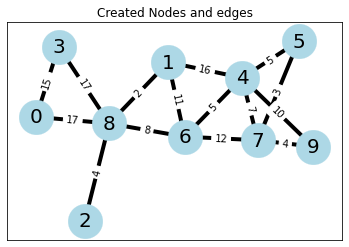

  Nodes Travelled through  Total Time Taken (in mins) Start Time (24hrs)
0                  [4, 5]                   10.655536           17:00:00
1                  [8, 1]                    3.540134           12:00:00
2            [9, 4, 6, 8]                   36.898490           14:00:00
3         [9, 4, 6, 8, 1]                   26.701726           06:00:00
4               [8, 6, 4]                   22.850876           14:00:00
5               [6, 4, 9]                    8.110609           04:00:00
6            [9, 4, 6, 8]                   12.392708           03:00:00
7         [2, 8, 6, 4, 9]                   31.375036           17:00:00
8                  [5, 7]                    3.224886           00:00:00
9            [7, 6, 8, 2]                   13.228915           02:00:00
Total time taken for all the Vechiles (in mins) : 168.97891630873139


In [8]:
if __name__ == "__main__":
  import random
  from datetime import datetime
  import pandas as pd
  G,W = Create_nodes()
  lst = [1, 2, 3, 4, 5, 6, 7, 8, 9]
  A,B,C=[],[],[]
  # Initiating 10 Vechiles to travel at different times.
  for i in range(10):
    S = random.randint(1,len(lst))
    D = random.randint(1,len(lst))
    while S == D:
      D = random.randint(1,len(lst))
    # Retriving the data of each vechile
    a,b,c = load_and_nodes(G,W,S,D,random.randint(0,20))
    A.append(datetime.strptime(str(a), '%H').time())
    B.append(b)
    C.append(c)
  data = {
  "Nodes Travelled through": B,
  "Total Time Taken (in mins)": C,
  "Start Time (24hrs)" : A
  }
  df = pd.DataFrame(data=data)
  print(df.head(10))
  remove_completedVechiles(df)
  print("Total time taken for all the Vechiles (in mins) : " + str(Total_sumofVechiles(C)))